In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df_laptop = pd.read_csv("keyword_and_lag_search_analytics_data1.csv")

In [3]:
df_laptop

,date,Sales,lenovo legion,lenovo laptops,lenovo,gaming laptops,legion laptop,lenovo gaming laptops,lenovo legion laptop,lenovo laptop,...,is_month_start,is_month_end,SMA_3,SMA_4,SMA_5,Sales_month,Sales_qtr,contri_week_month,contri_week_quarter,SI_Quarter_week
0,01/07/2018,3.102734e+05,28,69,100,62,28,35,30,48,...,0,0,0.000000e+00,0.000000e+00,0.000,1672106.384,5.647214e+06,0.185558,0.054943,0.656799
1,1/14/2018,5.774019e+05,27,66,96,59,27,51,32,46,...,0,0,0.000000e+00,0.000000e+00,0.000,1672106.384,5.647214e+06,0.345314,0.102245,0.860645
2,1/21/2018,4.059437e+05,27,66,94,60,26,46,26,46,...,0,0,0.000000e+00,0.000000e+00,0.000,1672106.384,5.647214e+06,0.242774,0.071884,0.769455
3,1/28/2018,3.784874e+05,26,67,95,69,19,51,22,46,...,0,0,4.312063e+05,0.000000e+00,0.000,1672106.384,5.647214e+06,0.226354,0.067022,0.654300
4,02/04/2018,4.607665e+05,24,64,88,61,23,45,25,45,...,0,0,4.539443e+05,4.180266e+05,0.000,2376650.170,5.647214e+06,0.193872,0.081592,0.589324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,7/26/2020,1.662375e+06,84,83,77,72,85,74,86,83,...,0,0,1.918020e+06,1.858023e+06,1909535.733,7416435.044,1.548428e+07,0.224147,0.107359,1.361488
134,08/02/2020,1.934459e+06,86,83,79,70,92,90,88,89,...,0,0,1.954986e+06,1.854109e+06,1818893.531,8067844.580,1.548428e+07,0.239774,0.124930,1.641888
135,08/09/2020,2.327555e+06,87,86,80,61,86,65,86,89,...,0,0,1.784856e+06,1.949854e+06,1870178.719,8067844.580,1.548428e+07,0.288498,0.150317,1.893072
136,8/16/2020,2.058943e+06,82,90,82,68,87,80,87,92,...,0,0,1.974796e+06,1.920530e+06,2025394.329,8067844.580,1.548428e+07,0.255204,0.132970,1.770490


In [4]:
#missing data

total = df_laptop.isnull().sum().sort_values(ascending=False)

percentage = (df_laptop.isnull().sum()/df_laptop.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(60)

,Total,Percentage
date,0,0.0
Sales,0,0.0
msi laptop,0,0.0
lenovo legion y530,0,0.0
legion 5 pro,0,0.0
lenovo legion y740,0,0.0
reddit gaming laptops,0,0.0
msi gaming laptop,0,0.0
good laptops for gaming,0,0.0
razer laptop,0,0.0


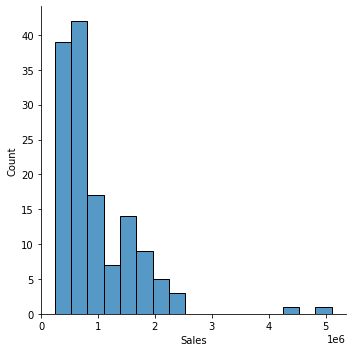

In [5]:
#Sales histogram
sns.displot(df_laptop['Sales'])

<AxesSubplot:>

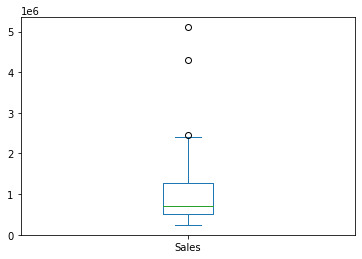

In [7]:
df_laptop['Sales'].plot.box()

In [12]:
df2018 = df_laptop.iloc[1:52]
df2019 = df_laptop.iloc[53:104]
df2020 = df_laptop.iloc[105:138]

<AxesSubplot:xlabel='Week_Number', ylabel='Sales'>

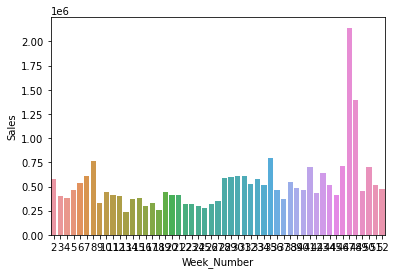

In [13]:
sns.barplot(data = df2018, x = 'Week_Number', y = 'Sales')

<AxesSubplot:xlabel='Month', ylabel='Sales'>

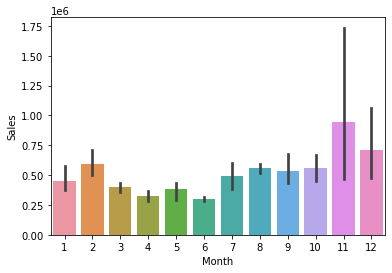

In [14]:
sns.barplot(data = df2018, x = 'Month', y = 'Sales')

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

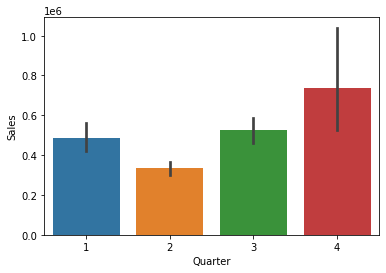

In [15]:
sns.barplot(data = df2018, x = 'Quarter', y = 'Sales')

<AxesSubplot:xlabel='Week_Number', ylabel='Sales'>

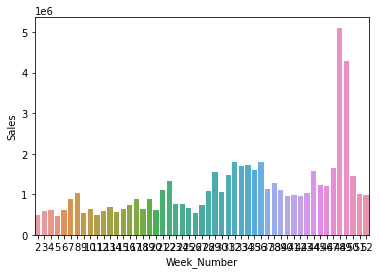

In [16]:
sns.barplot(data = df2019, x = 'Week_Number', y = 'Sales')

<AxesSubplot:xlabel='Month', ylabel='Sales'>

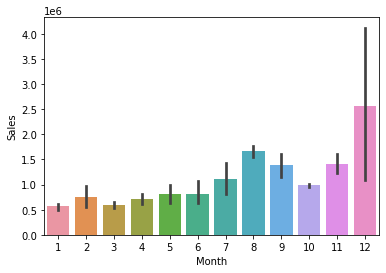

In [17]:
sns.barplot(data = df2019, x = 'Month', y = 'Sales')

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

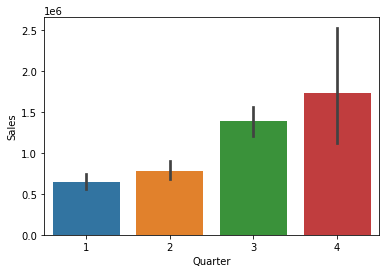

In [18]:
sns.barplot(data = df2019, x = 'Quarter', y = 'Sales')

<AxesSubplot:xlabel='Week_Number', ylabel='Sales'>

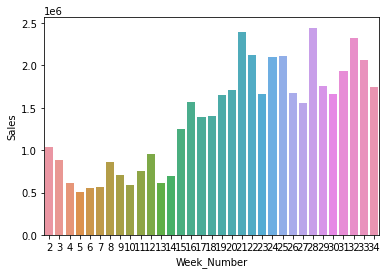

In [19]:
sns.barplot(data = df2020, x = 'Week_Number', y = 'Sales')

<AxesSubplot:xlabel='Month', ylabel='Sales'>

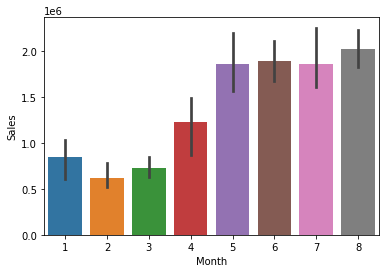

In [20]:
sns.barplot(data = df2020, x = 'Month', y = 'Sales')

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

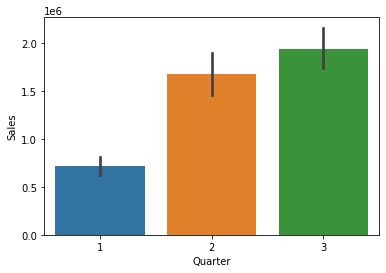

In [21]:
sns.barplot(data = df2020, x = 'Quarter', y = 'Sales')

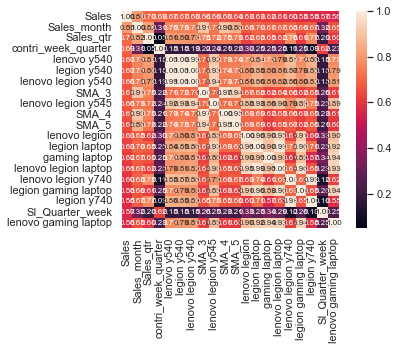

In [23]:
#sales correlation matrix
k = 20
corrmat = df_laptop.corr()
cols = corrmat.nlargest(k, 'Sales')['Sales'].index
cm = np.corrcoef(df_laptop[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size':8}, yticklabels = cols.values, xticklabels = cols.values)

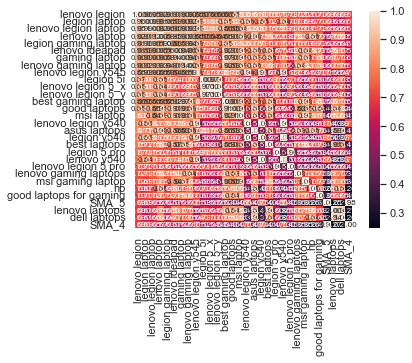

In [24]:
#sales correlation matrix
k = 30
corrmat = df_laptop.corr()
cols = corrmat.nlargest(k, 'lenovo legion')['lenovo legion'].index
cm = np.corrcoef(df_laptop[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size':8}, yticklabels = cols.values, xticklabels = cols.values)

In [25]:
df_sspec = df_laptop[['Sales', 'lenovo legion', 'legion laptop', 'lenovo legion laptop', 'lenovo laptop', 'legion gaming laptop', 'lenovo gaming laptop', 'lenovo legion 5_x', 'legion y520', 'lenovo legion y520', 'lenovo y520', 'lenovo legion 5_y', 'lenovo legion y545', 'legion y740', 'legion y530', 'legion y540', 'lenovo y540', 'lenovo legion y540', 'lenovo legion y530', 'legion 5 pro', 'lenovo legion y740', 'lenovo legion 5 pro', 'lenovo legion y7000', 'lenovo ideapad', 'msi laptop', 'legion 5i', 'razer laptop']]

df_sbroad = df_laptop[['Sales', 'gaming laptops', 'lenovo gaming laptops', 'lenovo laptops', 'lenovo', 'asus', 'hp', 'msi gaming laptop', 'best laptops', 'gaming laptop', 'best gaming laptops', 'dell laptops', 'asus laptops', 'best gaming laptop', 'laptops for gaming', 'good laptops', 'hp laptops', 'gaming laptops under 1000', 'reddit gaming laptops', 'gaming laptop', 'good laptops for gaming']]

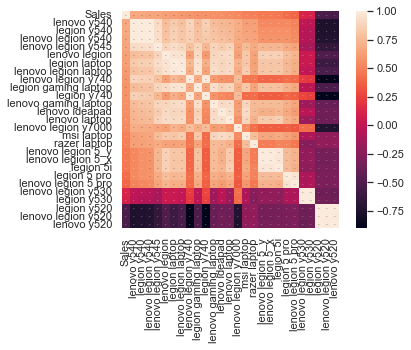

In [26]:
#sales correlation matrix
k = 28
sspeccorrmat = df_sspec.corr()
cols = sspeccorrmat.nlargest(k, 'Sales')['Sales'].index
cm = np.corrcoef(df_laptop[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size':0}, yticklabels = cols.values, xticklabels = cols.values)

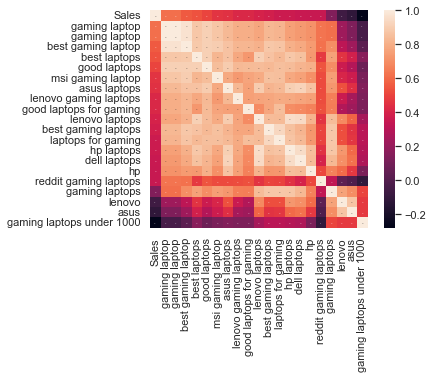

In [27]:
#sales correlation matrix
k = 25
sbroadcorrmat = df_sbroad.corr()
cols = sbroadcorrmat.nlargest(k, 'Sales')['Sales'].index
cm = np.corrcoef(df_laptop[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size':0}, yticklabels = cols.values, xticklabels = cols.values)

In [28]:
x = df_laptop[['lenovo legion', 'legion laptop', 'lenovo legion laptop', 'lenovo laptop', 'legion gaming laptop', 'lenovo gaming laptop', 'lenovo legion 5_x', 'legion y520', 'lenovo legion y520', 'lenovo y520', 'lenovo legion 5_y', 'lenovo legion y545', 'legion y740', 'legion y530', 'legion y540', 'lenovo y540', 'lenovo legion y540', 'lenovo legion y530', 'legion 5 pro', 'lenovo legion y740', 'lenovo legion 5 pro', 'lenovo legion y7000', 'lenovo ideapad', 'msi laptop', 'legion 5i', 'razer laptop', 'gaming laptops', 'lenovo gaming laptops', 'lenovo laptops', 'lenovo', 'asus', 'hp', 'msi gaming laptop', 'best laptops', 'gaming laptop', 'best gaming laptops', 'dell laptops', 'asus laptops', 'best gaming laptop', 'laptops for gaming', 'good laptops', 'hp laptops', 'gaming laptops under 1000', 'reddit gaming laptops', 'gaming laptop', 'good laptops for gaming']]

y = df_laptop['Sales']

In [29]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     5.327
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           6.49e-12
Time:                        11:49:34   Log-Likelihood:                -1967.8
No. Observations:                 138   AIC:                             4026.
Df Residuals:                      93   BIC:                             4157.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [30]:
# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [32]:
sfs1 = sfs(regr, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')

sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.3s finished

[2022-08-01 11:51:17] Features: 1/10 -- score: -289402436796.01624[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    0.3s finished

[2022-08-01 11:51:18] Features: 2/10 -- score: -275965061288.14325[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished

[2022-08-01 11:51:18] Features: 3/10 -- score: -267677854967.6206[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

In [33]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['const', 'legion y530', 'lenovo y540', 'lenovo legion y530', 'gaming laptops', 'lenovo laptops', 'asus', 'hp', 'msi gaming laptop', 'best gaming laptops']


In [35]:
a = df_laptop[['legion y530', 'lenovo y540', 'lenovo legion y530', 'gaming laptops', 'lenovo laptops', 'asus', 'hp', 'msi gaming laptop', 'best gaming laptops']]

In [41]:
#Multiple linear Regression based on stepwise model with top 10 features

regr2 = linear_model.LinearRegression()
regr2.fit(a, y)

a = sm.add_constant(a) # adding a constant
 
modela = sm.OLS(y, a).fit()
predictions3 = modela.predict(a) 
 
print_modela = modela.summary()
print(print_modela)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     17.72
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           8.75e-19
Time:                        11:55:40   Log-Likelihood:                -1998.8
No. Observations:                 138   AIC:                             4018.
Df Residuals:                     128   BIC:                             4047.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.864e+05   9

In [42]:
#Modifying MLR based on stepwise model by including only features significant at 10% level

b = df_laptop[['lenovo y540', 'lenovo legion y530', 'gaming laptops', 'lenovo laptops', 'asus', 'hp']]

In [43]:
regr3 = linear_model.LinearRegression()
regr3.fit(b, y)

b = sm.add_constant(b) # adding a constant
 
modelb = sm.OLS(y, b).fit()
predictions3 = modelb.predict(b) 
 
print_modelb = modelb.summary()
print(print_modelb)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     24.87
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           1.53e-19
Time:                        11:57:53   Log-Likelihood:                -2002.2
No. Observations:                 138   AIC:                             4018.
Df Residuals:                     131   BIC:                             4039.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.318e+05    9.4

In [44]:
#Further Modifying MLR by removing insignficiant variables

c = df_laptop[['lenovo y540', 'lenovo legion y530', 'gaming laptops', 'lenovo laptops']]

In [46]:
regr4 = linear_model.LinearRegression()
regr4.fit(c, y)

c = sm.add_constant(c) # adding a constant
 
modelc = sm.OLS(y, c).fit()
predictions3 = modelc.predict(c) 
 
print_modelc = modelc.summary()
print(print_modelc)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     36.10
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           2.09e-20
Time:                        12:00:13   Log-Likelihood:                -2003.9
No. Observations:                 138   AIC:                             4018.
Df Residuals:                     133   BIC:                             4032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -3.61e+05   2.81

In [52]:
#Checking extra

d = df_laptop[['lenovo y540', 'lenovo laptops']]

In [53]:
regr5 = linear_model.LinearRegression()
regr5.fit(d, y)

d = sm.add_constant(d) # adding a constant
 
modeld = sm.OLS(y, d).fit()
predictions3 = modeld.predict(d) 
 
print_modeld = modeld.summary()
print(print_modeld)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     60.91
Date:                Mon, 01 Aug 2022   Prob (F-statistic):           1.41e-19
Time:                        12:03:28   Log-Likelihood:                -2010.3
No. Observations:                 138   AIC:                             4027.
Df Residuals:                     135   BIC:                             4035.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.374e+04   2.43e+05     -0.

In [55]:
#Low R squared in all models indicates that the variables do not adequately explain the variation in Sales.
#A different model is hence required.
#However, it is interestng to note that the p-value for lenovo y540 has remained extremely large in all models.
#One possible reason for this is that it has been a hot seller with customers. i.e when customers search for this model online, they more often than not tend to buy it.